In [1]:
# import pipreqs
# pipreqs /Users/shiwa/Downloads/bank-additional/lib_req

# !pip freeze

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

C:\Users\shiwa\Miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\shiwa\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\shiwa\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
bank_data=pd.read_csv("bank-additional-full.csv",sep=";")
bank_data_1=pd.read_csv("bank-additional.csv",sep=";")

In [4]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
print("##############################################COMPLETE DATABASE##############################################")
print(bank_data.describe())
print("##############################################SUBSET DATABASE##############################################")
print(bank_data_1.describe())

##############################################COMPLETE DATABASE##############################################
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886      

#### After observing above comparision we can say that both the database have nearly same distribution in there for every column

In [6]:
Y = bank_data["y"]
bank_data.drop("y",axis='columns',inplace=True)

In [7]:
import numpy as np
print(bank_data.apply(lambda x : len(np.unique(x)),axis=0))

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
dtype: int64


From above we will consider everything below 10 is a categorical variable

In [8]:
bank_data.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
33536,43,blue-collar,married,basic.9y,no,yes,yes,cellular,may,tue,317,2,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1
8004,36,services,married,high.school,unknown,no,no,telephone,jun,mon,145,2,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1
4089,29,admin.,single,basic.9y,unknown,no,no,telephone,may,mon,333,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0
35875,62,technician,married,professional.course,no,yes,no,cellular,may,fri,181,2,999,1,failure,-1.8,92.893,-46.2,1.259,5099.1
40828,31,admin.,single,high.school,no,no,no,cellular,sep,mon,262,5,6,3,success,-1.1,94.199,-37.5,0.879,4963.6


In [9]:
bank_data_converted=bank_data.apply(lambda x : pd.Categorical(x) if(len(np.unique(x))<13) else pd.to_numeric(x),axis=0)

In [10]:
cat_colname=[j+"_"+str(i+1) for j in bank_data_converted.select_dtypes(include=['category']).columns for i in range(0,len(bank_data_converted[j].unique())) ]

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

OneHotEncoder_obj = OneHotEncoder()
cat_encoded = OneHotEncoder_obj.fit_transform(bank_data_converted.select_dtypes(include=['category'])).toarray()
Y=LabelEncoder().fit_transform(Y)
# # binary encode
# onehot_encoder = OneHotEncoder(sparse=False)
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# onehot_encoded = onehot_encoder.fit_transform(integer_encoded)



In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_df=bank_data_converted.select_dtypes(include=['int64','float64'])

[1]

[1]

In [13]:
final_db=np.concatenate((scaler.fit_transform(num_df),cat_encoded),axis=1)

In [14]:
column_list=list(num_df.columns)
column_list.extend(cat_colname)

In [15]:
len(column_list)

89

In [16]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(final_db,Y,test_size=0.15,random_state=123)

In [17]:
print("Train Shape")
print(train_x.shape)
print("Test Shape")
print(test_x.shape)

Train Shape
(35009, 89)
Test Shape
(6179, 89)


In [18]:
def conf_matrix(orignal,prediction):
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    conf_matrix = confusion_matrix(y_true=orignal, y_pred=prediction)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

## Baseline Model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
def Logistic_Classifier(X_train,y_train,X_test,y_test):
    # fit model no training data
    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    from sklearn.metrics import accuracy_score
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    F1_s = f1_score(y_test, predictions)
    print("F1- Score: %.2f%%" % (F1_s))
    conf_matrix(orignal=y_test,prediction=predictions)
    return(model)

Accuracy: 91.36%
F1- Score: 0.52%


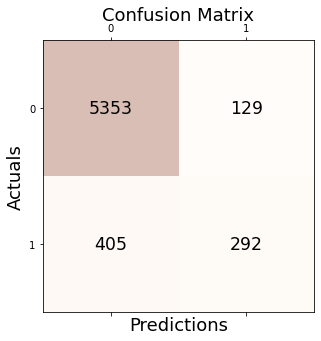

In [20]:
Logistic_model=Logistic_Classifier(train_x,train_y,test_x,test_y)

## Improved XGBoost Model

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
def XGB_Classifier(X_train,y_train,X_test,y_test):
    # fit model no training data
    model = XGBClassifier(max_depth=6, objective='binary:logistic', n_estimators=800,n_jobs=-1,random_state=123)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    from sklearn.metrics import accuracy_score
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    F1_s = f1_score(y_test, predictions)
    print("F1- Score: " + str(F1_s))
    conf_matrix(orignal=y_test,prediction=predictions)
    return(model)

[12:29:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 90.95%
F1- Score: 0.5768357305071916


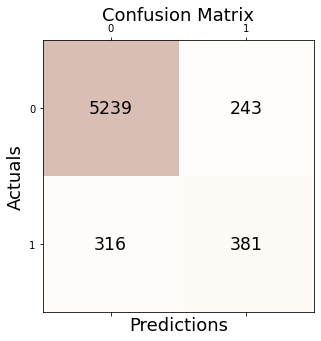

In [22]:
XG_model=XGB_Classifier(train_x,train_y,test_x,test_y)
XG_feature_importances={column_list[i]:XG_model.feature_importances_[i] for i in range(0,len(column_list))}
XG_feature_importances=dict(sorted(XG_feature_importances.items(), key=lambda x: x[1], reverse=True))

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_importance_graph(keys,values):
    sns.set(rc = {'figure.figsize':(20,12)})
    plot=sns.barplot(keys,values)
    plt.setp(plot.get_xticklabels(), rotation=90)

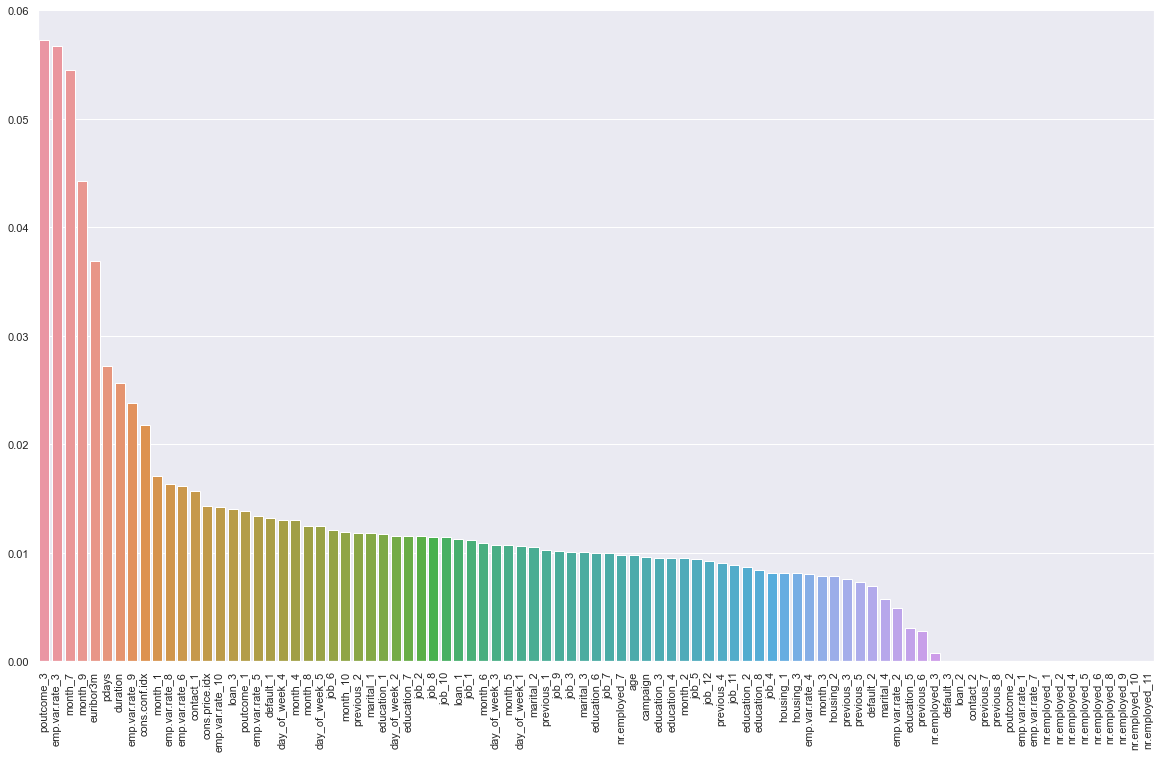

In [24]:
plot_importance_graph(list(XG_feature_importances.keys()),list(XG_feature_importances.values()))

## Since our dependent variable is imbalanced we will create a Random over sampler to increase the rows of minority class

In [25]:
def over_under_sampling(X_train, y_train):
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.pipeline import Pipeline
    from imblearn.over_sampling import SMOTE,RandomOverSampler,ADASYN
    # oversample = SMOTE(random_state=1,n_jobs=-1,)
    # oversample = ADASYN(random_state=1,n_jobs=-1,)
    oversample = RandomOverSampler(random_state=1,)
    undersample = RandomUnderSampler()
    steps = [("o", oversample), ("u", undersample)]
    pipeline = Pipeline(steps=steps)
    # transform the dataset
    X, y = pipeline.fit_resample(X_train, y_train)
    return(X,y)

[12:29:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 90.58%
F1- Score: 0.6176084099868593


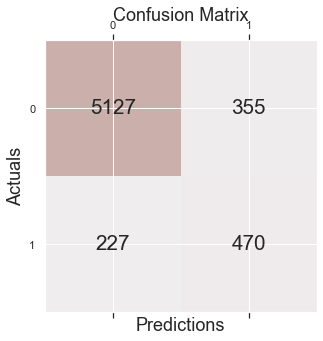

In [26]:
X,y= over_under_sampling(train_x, train_y)
XG_model_after_oversampling=XGB_Classifier(X,y,test_x,test_y)
XG_feature_importances_after_oversampling={column_list[i]:XG_model_after_oversampling.feature_importances_[i] for i in range(0,len(column_list))}
XG_feature_importances_after_oversampling=dict(sorted(XG_feature_importances_after_oversampling.items(), key=lambda x: x[1], reverse=True))

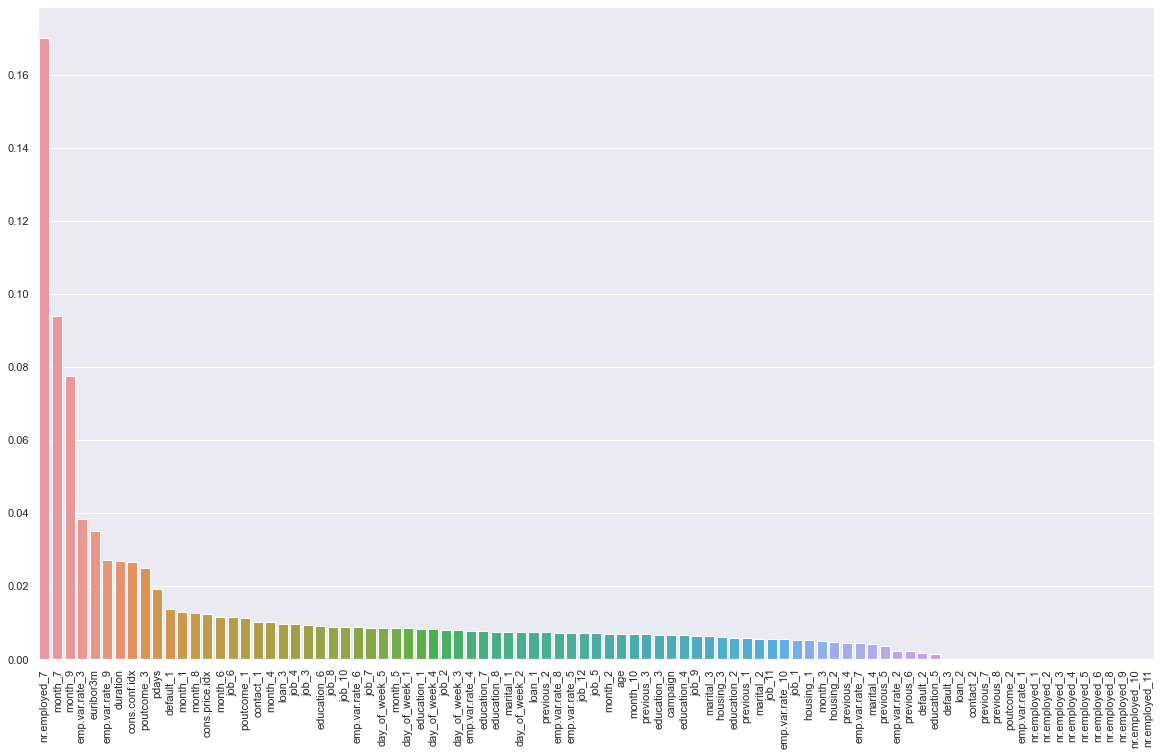

In [27]:
plot_importance_graph(list(XG_feature_importances_after_oversampling.keys()),list(XG_feature_importances_after_oversampling.values()))

## Now we will subset only the required columns for optimization purpose

In [28]:
subseted_column_list=[i for i, j in XG_feature_importances.items() if j>0.001]
subseted_column_index=[i for i in range(len(column_list)) if(column_list[i] in subseted_column_list)]

[12:30:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 90.69%
F1- Score: 0.6219592373438527


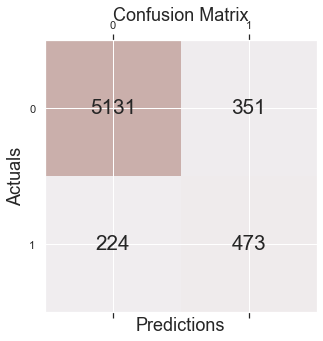

In [29]:
train_x_subset=[i[subseted_column_index] for i in X]
test_x_subset=[i[subseted_column_index] for i in test_x]
XG_model_after_oversampling_subset=XGB_Classifier(train_x_subset,y,test_x_subset,test_y)
XG_feature_importances_after_oversampling_subset={column_list[subseted_column_index[i]]:XG_model_after_oversampling_subset.feature_importances_[i] for i in range(0,len(subseted_column_index))}
XG_feature_importances_after_oversampling_subset=dict(sorted(XG_feature_importances_after_oversampling_subset.items(), key=lambda x: x[1], reverse=True))

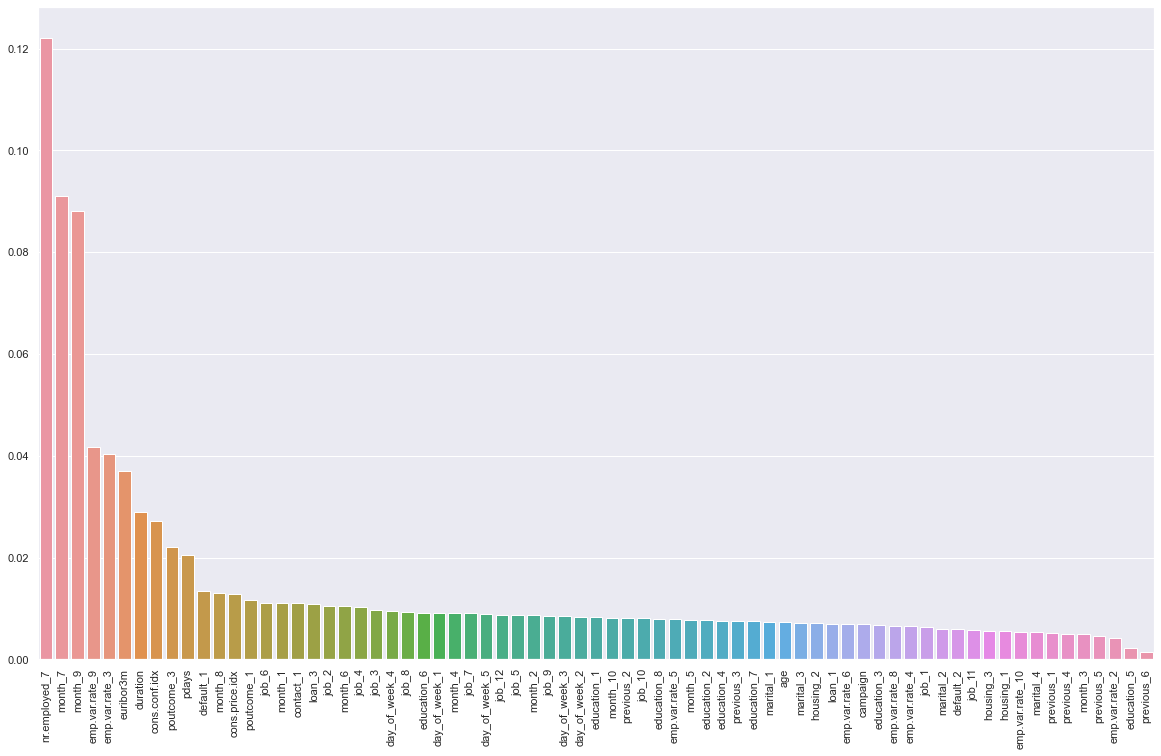

In [30]:
plot_importance_graph(list(XG_feature_importances_after_oversampling_subset.keys()),list(XG_feature_importances_after_oversampling_subset.values()))

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

# Init Grid Search
grid_cv = GridSearchCV(XG_model_after_oversampling_subset, param_grid, n_jobs=-1, cv=3, scoring="f1")

# Fit
_ = grid_cv.fit(train_x_subset, y)